In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_excel('Data_amity_university.xlsx')  # Replace with your file path

data_2023 = pd.read_excel('Data_amity_university.xlsx', sheet_name='2023')  # Replace with your file path

# Display the data from the '2024' sheet
print(data_2023)

   Institute ID                                               Name  \
0   IR-O-U-0456              Indian Institute of Technology Madras   
1   IR-O-U-0220                        Indian Institute of Science   
2   IR-O-I-1074               Indian Institute of Technology Delhi   
3   IR-O-U-0306              Indian Institute of Technology Bombay   
4   IR-O-I-1075              Indian Institute of Technology Kanpur   
..          ...                                                ...   
95  IR-O-U-0318                                  Mumbai University   
96  IR-O-U-0389                               Banasthali Vidyapith   
97  IR-O-I-1486  Sri Ramachandra Institute of Higher Education ...   
98  IR-O-S-8972            Indian Institute of Management Calcutta   
99  IR-O-U-0217                                  Christ University   

            State  Score  Rank  TLR (100)  RPC (100)  GO (100)  OI (100)  \
0      Tamil Nadu  86.69     1      86.45      89.88     87.22     63.59   
1      

In [6]:
tlr_data = data_2023[['Name', 'TLR (100)']].copy()

In [7]:
print(tlr_data.columns)


Index(['Name', 'TLR (100)'], dtype='object')


In [8]:
tlr_data.columns = tlr_data.columns.str.strip()  # Removes leading/trailing spaces
tlr_data.columns = tlr_data.columns.str.lower()  # Converts all column names to lowercase
print(tlr_data.columns)  # Verify the updated column names


Index(['name', 'tlr (100)'], dtype='object')


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


tlr_data = pd.read_excel('Data_amity_university.xlsx', sheet_name='2023')  

# Check and normalize column names
tlr_data.columns = tlr_data.columns.str.strip().str.lower()  # Normalize column names
print(tlr_data.columns) 


if 'tlr (100)' in tlr_data.columns:  # Check if the column exists
    scaler = StandardScaler()
    tlr_data['scaled_tlr_scores'] = scaler.fit_transform(tlr_data[['tlr (100)']])
    print(tlr_data.head())
else:
    print("Column 'tlr scores' not found in the DataFrame.")


Index(['institute id', 'name', 'state', 'score', 'rank', 'tlr (100)',
       'rpc (100)', 'go (100)', 'oi (100)', 'perception (100)'],
      dtype='object')
  institute id                                   name          state  score  \
0  IR-O-U-0456  Indian Institute of Technology Madras     Tamil Nadu  86.69   
1  IR-O-U-0220            Indian Institute of Science      Karnataka  83.09   
2  IR-O-I-1074   Indian Institute of Technology Delhi          Delhi  82.16   
3  IR-O-U-0306  Indian Institute of Technology Bombay    Maharashtra  81.28   
4  IR-O-I-1075  Indian Institute of Technology Kanpur  Uttar Pradesh  77.23   

   rank  tlr (100)  rpc (100)  go (100)  oi (100)  perception (100)  \
0     1      86.45      89.88     87.22     63.59            100.00   
1     2      82.43      88.45     80.57     59.23             97.94   
2     3      82.06      85.23     79.21     70.32             90.98   
3     4      80.71      86.14     84.26     58.76             84.98   
4     5      

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
tlr_data['Cluster'] = kmeans.fit_predict(tlr_data[['scaled_tlr_scores']])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


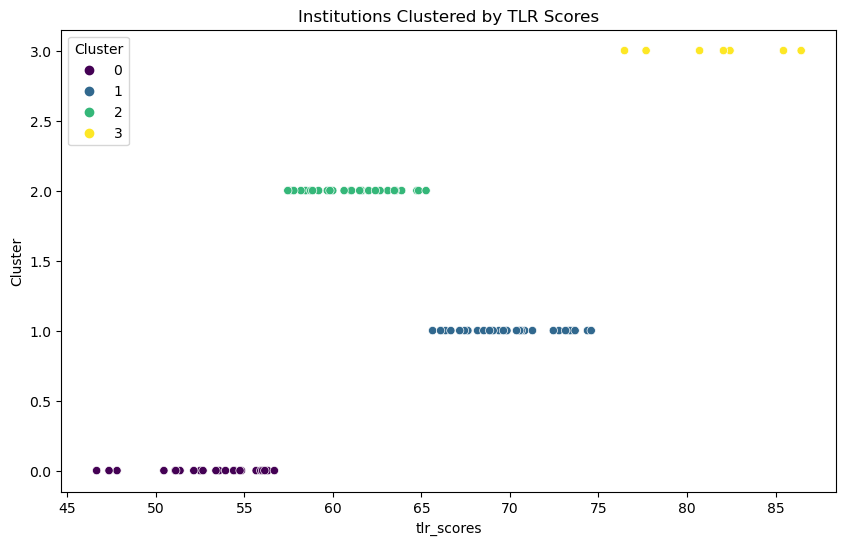

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tlr (100)', y='Cluster', data=tlr_data, hue='Cluster', palette='viridis')
plt.title('Institutions Clustered by TLR Scores')
plt.xlabel('tlr_scores')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()


In [12]:
# Find the top group (highest average TLR score)
top_group = tlr_data.groupby('Cluster')['tlr (100)'].mean().idxmax()

# List institutions in the top group
top_group_institutions = tlr_data[tlr_data['Cluster'] == top_group]
print("Institutions in the Top Group:")
print(top_group_institutions[['name', 'tlr (100)']])


Institutions in the Top Group:
                                             name  tlr (100)
0           Indian Institute of Technology Madras      86.45
1                     Indian Institute of Science      82.43
2            Indian Institute of Technology Delhi      82.06
3           Indian Institute of Technology Bombay      80.71
4           Indian Institute of Technology Kanpur      85.45
5  All India Institute of Medical Sciences, Delhi      76.47
7          Indian Institute of Technology Roorkee      77.69


In [21]:
top_group_institutions.to_csv('top_group_institutions_2023.csv', index=False)



In [14]:
pip install numpy pandas matplotlib seaborn gspread oauth2client


In [16]:
data = pd.read_excel('Data_amity_university.xlsx')  # Replace with your file path

data_2023 = pd.read_excel('Data_amity_university.xlsx', sheet_name='2023')  # Replace with your file path

# Display the data from the '2024' sheet
print(data_2023)

   Institute ID                                               Name  \
0   IR-O-U-0456              Indian Institute of Technology Madras   
1   IR-O-U-0220                        Indian Institute of Science   
2   IR-O-I-1074               Indian Institute of Technology Delhi   
3   IR-O-U-0306              Indian Institute of Technology Bombay   
4   IR-O-I-1075              Indian Institute of Technology Kanpur   
..          ...                                                ...   
95  IR-O-U-0318                                  Mumbai University   
96  IR-O-U-0389                               Banasthali Vidyapith   
97  IR-O-I-1486  Sri Ramachandra Institute of Higher Education ...   
98  IR-O-S-8972            Indian Institute of Management Calcutta   
99  IR-O-U-0217                                  Christ University   

            State  Score  Rank  TLR (100)  RPC (100)  GO (100)  OI (100)  \
0      Tamil Nadu  86.69     1      86.45      89.88     87.22     63.59   
1      

In [17]:
# Group by and calculate mean, median
grouped_data = data_2023.groupby('Name').agg(
    TLR_Mean=('TLR (100)', 'mean'),
    TLR_Median=('TLR (100)', 'median')
).reset_index()

print(grouped_data)


                                                 Name  TLR_Mean  TLR_Median
0                                 Alagappa University     61.51       61.51
1                           Aligarh Muslim University     68.87       68.87
2      All India Institute of Medical Sciences, Delhi     76.47       76.47
3   All India Institute of Medical Sciences, Rishi...     70.55       70.55
4                                    Amity University     47.80       47.80
..                                                ...       ...         ...
95                              University of Kashmir     70.64       70.64
96                               University of Madras     64.74       64.74
97                    Vellore Institute of Technology     55.66       55.66
98  Visvesvaraya National Institute of Technology,...     53.93       53.93
99              Visvesvaraya Technological University     58.85       58.85

[100 rows x 3 columns]


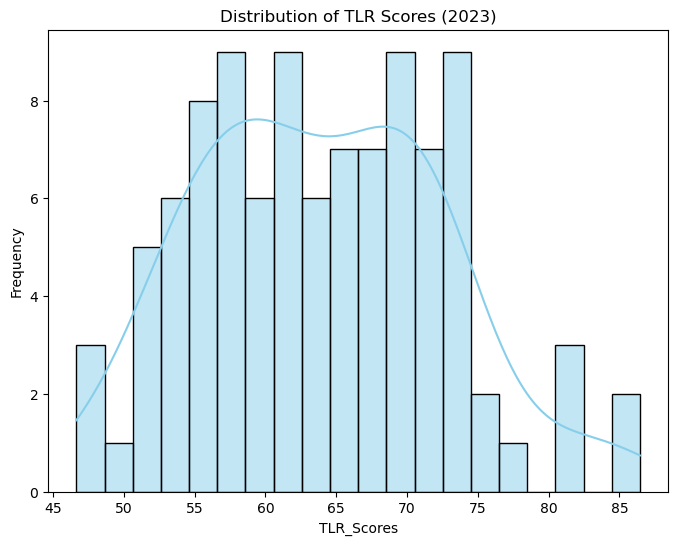

In [19]:
# TLR Scores Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data_2023['TLR (100)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of TLR Scores (2023)')
plt.xlabel('TLR_Scores')
plt.ylabel('Frequency')
plt.show()



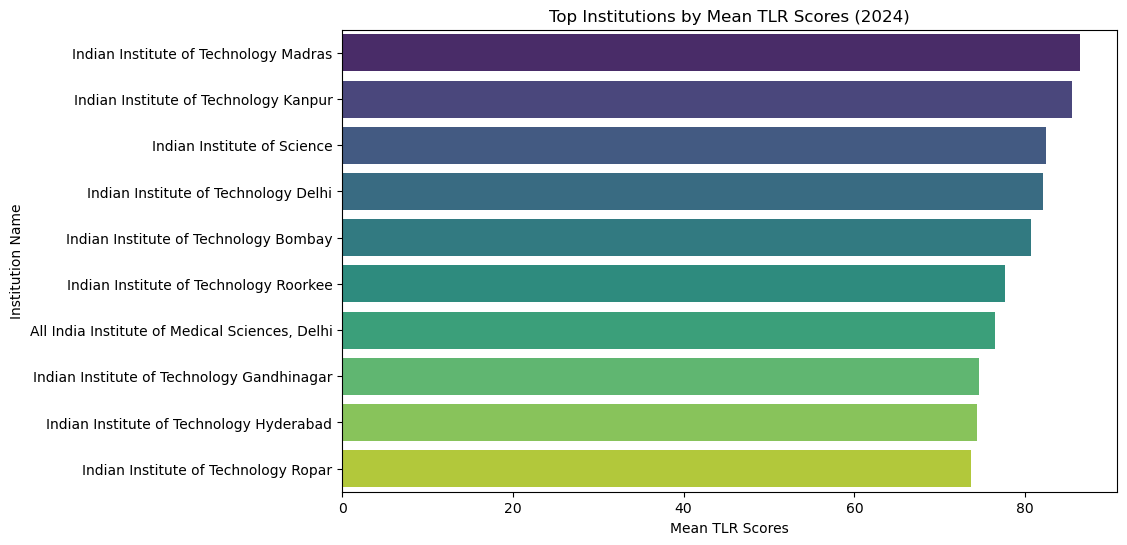

In [20]:
# Mean TLR Scores by Institution
plt.figure(figsize=(10, 6))
top_institutions = grouped_data.sort_values('TLR_Mean', ascending=False).head(10)
sns.barplot(data=top_institutions, x='TLR_Mean', y='Name', palette='viridis')
plt.title('Top Institutions by Mean TLR Scores (2024)')
plt.xlabel('Mean TLR Scores')
plt.ylabel('Institution Name')
plt.show()